In [1]:
# Import libraries.
import matplotlib.pyplot as plt
import pyfolio as pf
import pandas as pd
import datetime

# Ignore pyfolio warnings.
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Juan Esteban\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Juan Esteban\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  

In [2]:
expert_data = pd.read_csv("dataset/expert_5874_data.csv")
expert_data = expert_data[expert_data.direction == "out"][["date_time", "balance"]]
expert_data.head()

date_time  balance
1  2018-01-10 20:00:00  4913.16
3  2018-01-17 18:00:00  4629.66
5  2018-01-17 21:37:20  4644.86
7  2018-01-22 00:00:00  4650.46
9  2018-01-23 07:00:00  4664.19

In [3]:
tradeTimes = expert_data["date_time"].values
for i in range(len(tradeTimes)):
    tradeTimes[i] = datetime.datetime.strptime(tradeTimes[i], '%Y-%m-%d %H:%M:%S')
tradeBalance = expert_data["balance"].values

In [4]:
def lastValue(x):
    try:
        reply = x[-1]
    except:
        reply = None
    return reply

In [5]:
# Generate daily returns array.
returns = pd.Series(data=tradeBalance, index=tradeTimes).resample('D').agg(lastValue).pct_change(fill_method='pad').fillna(0).tz_localize('UTC')

In [6]:
returns.head(10)

2018-01-10 00:00:00+00:00    0.000000
2018-01-11 00:00:00+00:00    0.000000
2018-01-12 00:00:00+00:00    0.000000
2018-01-13 00:00:00+00:00    0.000000
2018-01-14 00:00:00+00:00    0.000000
2018-01-15 00:00:00+00:00    0.000000
2018-01-16 00:00:00+00:00    0.000000
2018-01-17 00:00:00+00:00   -0.054608
2018-01-18 00:00:00+00:00    0.000000
2018-01-19 00:00:00+00:00    0.000000
Freq: D, dtype: float64

In [7]:
pf.show_perf_stats(returns)

In [14]:
pf.show_worst_drawdown_periods(returns, top = 5)

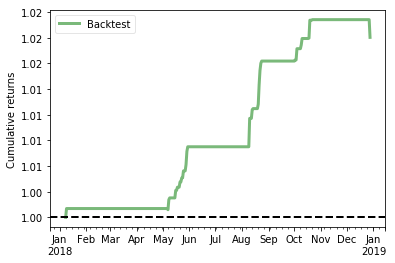

In [75]:
# Cumulative Returns.
pf.plot_rolling_returns(returns)

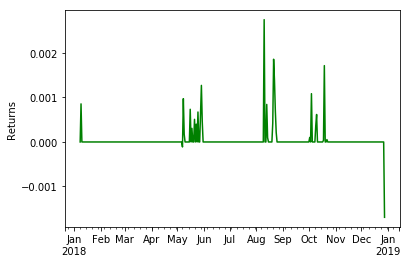

In [76]:
# Returns plot.
pf.plot_returns(returns)

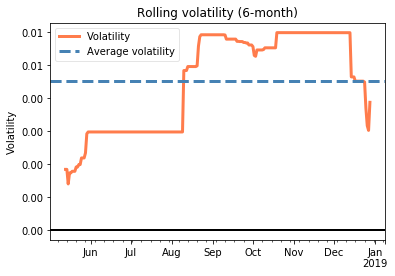

In [69]:
# Expert volatility.
pf.plot_rolling_volatility(returns)

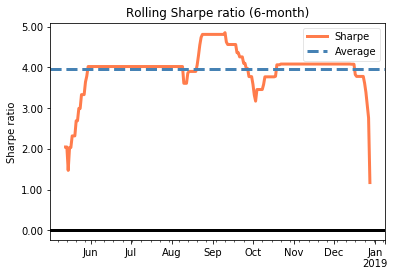

In [77]:
# Sharpe Ratio thorugh strategy.
pf.plot_rolling_sharpe(returns)

Text(0.5,0,'Date')

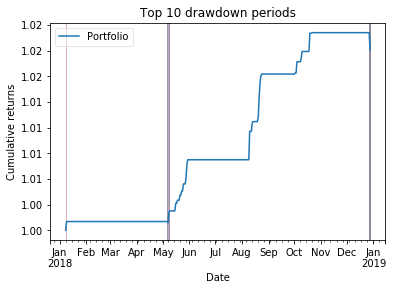

In [91]:
# Top 10 drawdown periods.
pf.plot_drawdown_periods(returns).set_xlabel("Date")

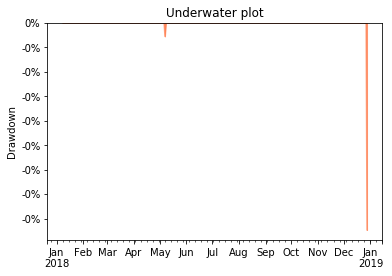

In [79]:
# Drawdown Underwater.
pf.plot_drawdown_underwater(returns)

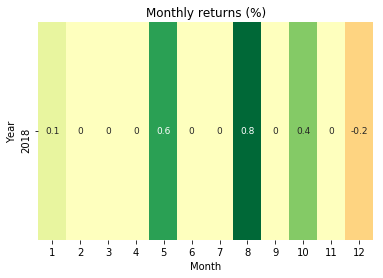

In [80]:
# Monthly Returns (%)
pf.plot_monthly_returns_heatmap(returns)

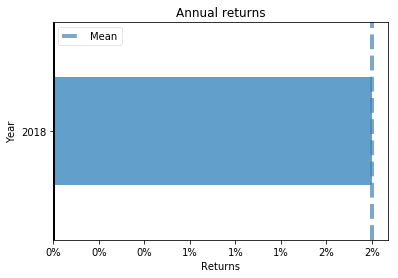

In [82]:
# Anual Returns.
pf.plot_annual_returns(returns)

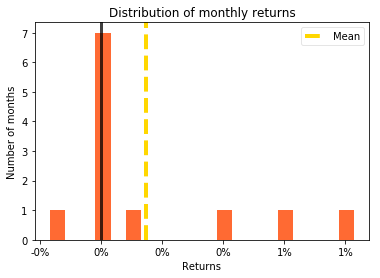

In [83]:
# Distribution of monthly returns.
pf.plot_monthly_returns_dist(returns)

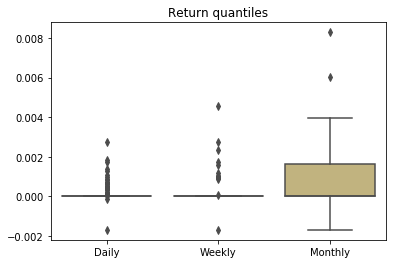

In [85]:
# Quantiles returns by day, week and month.
pf.plot_return_quantiles(returns)

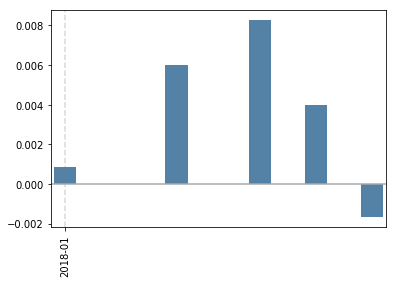

In [87]:
# Monthly returns.
pf.plot_monthly_returns_timeseries(returns)

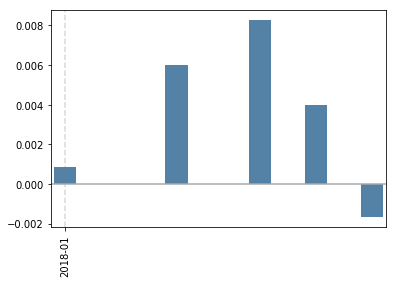

In [93]:
# Monthly Returns Timeseries.
pf.plot_monthly_returns_timeseries(returns)

In [21]:
# Generate HTML strategy report.
from jinja2 import Environment, FileSystemLoader
env = Environment(loader = FileSystemLoader("."))
template = env.get_template("./strategy_report.html")

template_vars = {
                 "title": "Strategy Report Expert 1", 
                 "number": 1,
                 "data": returns.to_frame().to_html()
                }
html_out = template.render(template_vars)
html_out

Html_file = open("example.html", "w")
Html_file.write(html_out)
Html_file.close()
# Generate PDF strategy report.
#from weasyprint import HTML
#HTML(string = html.out).write_pdf("report.pdf")